In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [35]:
crime=pd.read_csv('/crime_data.csv')

In [36]:
crime2=crime.drop('Unnamed: 0',axis=1)

In [38]:
crime3=pd.DataFrame(normalize(crime2),columns=crime2.columns)

In [39]:
crime3

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [40]:
# Clustering using K-Means

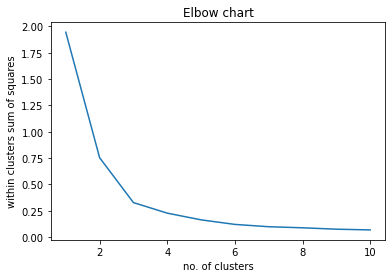

In [41]:
from pandas.core.common import random_state
x=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(crime3)
  x.append(kmeans.inertia_)

plt.plot(range(1,11),x)
plt.title('Elbow chart')
plt.xlabel('no. of clusters')
plt.ylabel('within clusters sum of squares')
plt.show()


In [42]:
# k=4

In [47]:
cluster_algorithm=KMeans(4,random_state=42)
cluster_algorithm.fit(crime3)

KMeans(n_clusters=4, random_state=42)

In [49]:
crime['clusters']=cluster_algorithm.labels_

In [50]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [51]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.021053,260.526316,66.421053,27.694737
1,1,4.881818,111.363636,68.545455,16.354545
2,2,2.616667,54.833333,62.000000,12.333333
3,3,6.542857,145.285714,63.500000,20.107143


In [52]:
crime.loc[crime['clusters']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
